# 3.6 Ideal gas assumption for Water

## Problem Statement:

Imagine $1\:kg$ of water vapor at $2\:MPa$ and $400 ^{\circ}  C$. Calculate its volume based on the following. Calculate the error in percentage.

a) thermodynamic tables using coolprop

b) ideal gas assumption

c) ideal gas equation of state coupled with compressibility factor ($Z$)

d) pinpoint the water at this state on its phase diagram and monitor the ideal gas assumption error based on the distance from the triple point

### Solution Approach for a)

In [1]:
#importing the required library
import numpy as np
import CoolProp.CoolProp as CP
P = 2E+6 #pressure of wator vapor in Pa
T = 400 + 273.15 #water vapor temperature in K
m = 1 #mass of water vapor in kg
D = CP.PropsSI('D', 'P', P, 'T', T, 'Water') #calculating density using coolprop kg/m
V = m / D #volume occupied m3
print('The volume of water vapor based on thermodynamic tables is',f"{V:.3f}",'m3')

## this value is treated as reference for error calculation since it's based on experiments
V_ref = V

The volume of water vapor based on thermodynamic tables is 0.151 m3


### Solution Approach for b)

To Calculate $V$ the ideal gas equation of state shall be used where

$V=mRT/P$

In [2]:
#introducing constant R
R = 0.4615 #Steam gas constant in kJ/kg.K
P_kpa = P / 1000 #pressure need to be in KPa to be consistent in ideal gas equation
V = m * R * T / P_kpa
print('The volume of water wapor based on ideal gas correlation is',f"{V:.3f}",'m3')

#calculating error
E = np.abs(V-V_ref)/V_ref * 100
print('The error based on ideal gas correlation is',f"{E:.3f}",'%')

The volume of water wapor based on ideal gas correlation is 0.155 m3
The error based on ideal gas correlation is 2.721 %


### Solution Approach for c)

In [3]:
#Introducing critical values
P_crit = 22.06 #critical pressure for water in MPa
T_crit = 647.1 #critical temperature for water in k

#calculating reduced pressure and temperature
P_r = P / 22.06E+6 #reduced pressure
T_r = T / T_crit  #reduced temperature

#now the code for Question#5 in this chapter is used to calculate compressibility factor (Z)
#importing required library
import numpy as np
import matplotlib.pyplot as plt

#introducing constants
b1 = 0.1181193
b2 = 0.265728
b3 = 0.154790
b4 = 0.030323
c1 = 0.0236744
c2 = 0.0186984
c3 = 0
c4 = 0.042724
d1 = 0.155488E-4
d2 = 0.623689E-4
betha = 0.65392
gamma = 0.060167

B = b1 - b2/T_r - b3/T_r**2 - b4/T_r**3
C = c1 - c2/T_r + c3/T_r**3
D = d1 + d2/T_r

#V_r in an array structure
# an array of V_r is to be built so that Z is calculated based upon. Otherwise, the equation can't be solved analytically for V_r
V_r = np.logspace(-0.9, 1.65, 10000) 
Z_array = 1 + B/V_r + C/V_r**2 + D/V_r**5 + c4*(betha + gamma/V_r**2)*np.exp(-gamma/V_r**2)/(T_r**3 * V_r**2) #Lee-Kesler equation
P_r_array = Z_array * T_r / V_r #calculating P_r based on the array built for V_r

#finding the index of the array element in P_r_array which is closest to the desired P_r value
difference_array = np.absolute(P_r_array-P_r)
index = difference_array.argmin()
Z = Z_array[index]
print('The compressibility factor value for P_r =',f"{P_r:.3f}", 'and T_r =', f"{T_r:.3f}", 'is', f"{Z:.3f}")

The compressibility factor value for P_r = 0.091 and T_r = 1.040 is 0.973


Looking at compressibility factor,

$Z=Pv/RT=PV/mRT$

rearranging for V,

$V=ZmRT/P$

In [4]:
V = Z * m * R * T / P_kpa
print('The volume of water wapor based on ideal gas correlation coupled with compressibiity factor is',f"{V:.3f}",'m3')

#calculating error
E = np.abs(V-V_ref)/V_ref * 100
print('The error based on ideal gas correlation coupled with compressibiity factor is',f"{E:.3f}",'%')

The volume of water wapor based on ideal gas correlation coupled with compressibiity factor is 0.151 m3
The error based on ideal gas correlation coupled with compressibiity factor is 0.082 %


### Solution Approach for d)

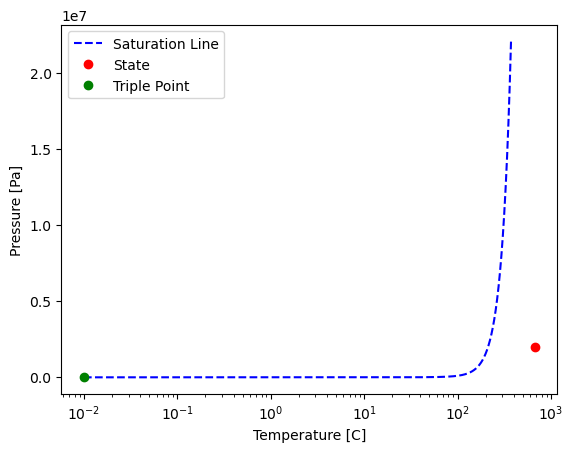

In [5]:
# define variables
Q = 1  # define the steam quality as 1, which is 100% vapor
fluid = "water"  # define the fluid or material of interest, for full list see CP.Fluidslist()
T_min = CP.PropsSI("Tmin", fluid)  # this is the triple-point temp we can get data for water
P_min = CP.PropsSI("P", "T", T_min, "Q", Q, fluid)  # triple-point temp for pressure
T_max = CP.PropsSI("Tcrit", fluid)  # this is the max temp we can get data for water
T_vals = np.linspace(T_min, T_max, 1000)  # define an array of values from T_min to T_max

pressure = [CP.PropsSI("P", "T", T, "Q", Q, fluid) for T in T_vals]  # call for pressure values using CoolProp

plt.plot(T_vals-273.15, pressure, "--b", label="Saturation Line")  # plot temp vs specific vol
plt.xscale("log")  # use log scale on x axis

## something interesting happenning -- why does Saturated liq and vapor P-T curve fall into the same curve?

plt.xlabel("Temperature [C]")  # give x axis a label
plt.ylabel("Pressure [Pa]")  # give y axis a label

# plot various points on the T-v diagram:
plt.plot(T,P,'or', label = 'State')
plt.plot(T_min-273.15,P_min,'og', label = 'Triple Point')

plt.legend()